In [11]:
# Este comando descarga el repositorio entero a una carpeta llamada 'TFMDS' en Colab.
#!git clone https://github.com/jmorala/TFMDS.git

# Inicializar directorios
Clonar repositorio github
Posicionarse en el directorio raíz

In [12]:
import os

# Detectar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Configurar el directorio de trabajo según el entorno
if IN_COLAB:
    os.chdir('TFMDS')
else:
    # En VS Code local, nos movemos al directorio raíz del proyecto
    # Usa raw string para evitar errores de escape en rutas Windows
    current_dir = r'C:\Users\jmora\Documents\TFMDS'
    os.chdir(current_dir)

# OPCIONAL: Para verificar que estás en la ruta correcta y ver las carpetas
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: C:\Users\jmora\Documents\TFMDS


## Lectura de fichero y adaptación de los tipos


In [13]:
import pandas as pd

# Ruta relativa del archivo CSV
RUTA_DATOS = 'datos/STDatosVentasTiendaWIP.csv'

# Cargar el archivo en un DataFrame de Pandas
dfSTventas = pd.read_csv(RUTA_DATOS, sep=';',
    parse_dates=['idSecuencia'])

# Muestra las primeras filas y la información de las columnas para iniciar la exploración
print("Primeras filas del DataFrame:")
print(dfSTventas.head())

print("\nInformación de las columnas y tipos de datos:")
dfSTventas.info()

Primeras filas del DataFrame:
  idSecuencia  producto  udsVenta  bolPromocion  bolOpen  bolHoliday  Cluster  \
0  2022-11-06         1         0             1        0           1        2   
1  2022-11-07         1        12             1        1           0        2   
2  2022-11-08         1        28             1        1           0        2   
3  2022-11-09         1        14             1        1           0        2   
4  2022-11-10         1        26             1        1           0        2   

   dia_semana  mes  trimestre  fin_de_semana  
0           6   11          4              1  
1           0   11          4              0  
2           1   11          4              0  
3           2   11          4              0  
4           3   11          4              0  

Información de las columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653514 entries, 0 to 653513
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 

# Generar dataframes para distintos tests

In [17]:
# Generar dataframe con la suma diaria de ventas: agrupar por día y sumar udsVenta
dfSTVentasTotales = dfSTventas.groupby('idSecuencia')['udsVenta'].sum().reset_index()
# Generar dataframe con la suma diaria de ventas por cluster
dfSTVentasCluster = dfSTventas.groupby(['idSecuencia', 'Cluster'])['udsVenta'].sum().reset_index()

# Autoregresión

C:\Users\jmora\AppData\Local\Temp\ipykernel_9280\1291571375.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.fillna(method='ffill')  # forward-fill; puedes cambiar a .bfill() o interpolación


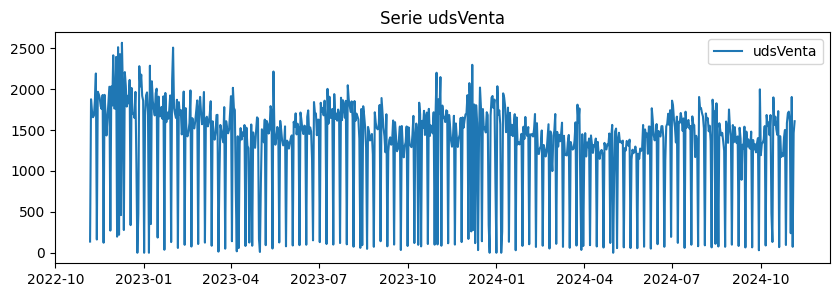

Tamaño train: 584, tamaño test: 147
             aic          bic        rmse
lag                                      
1    9114.833383  9127.937945  548.379506
2    9100.163715  9117.629597  548.387285
3    9086.739545  9108.563299  548.293219
4    9073.616523  9099.794691  548.236131
5    9060.325164  9090.854282  548.152605
6    9025.634338  9060.510929  546.014608
7    8567.819113  8607.039693  490.536458
8    8555.551741  8599.112817  490.359267
9    8538.591156  8586.489227  489.376216
10   8524.702861  8576.934414  487.262933
11   8511.641964  8568.203479  487.458459
12   8499.161208  8560.049154  487.404731
13   8486.756976  8551.967814  488.825325
14   8391.865615  8461.395796  421.258920
15   8379.885421  8453.731388  423.482997
16   8367.102323  8445.260509  422.848638
17   8353.152968  8435.619794  420.431996
18   8339.572740  8426.344621  416.797439
19   8323.242568  8414.315908  412.316221
20   8311.163990  8406.535184  411.297903
21   8267.288970  8366.954401  366.54833

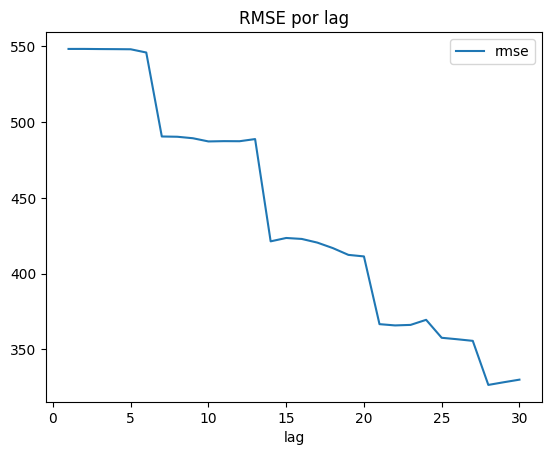

Mejor lag según RMSE: 28
                            AutoReg Model Results                             
Dep. Variable:               udsVenta   No. Observations:                  584
Model:                    AutoReg(28)   Log Likelihood               -4037.115
Method:               Conditional MLE   S.D. of innovations            344.488
Date:               do., 16 nov. 2025   AIC                           8134.231
Time:                        10:03:59   BIC                           8263.854
Sample:                    12-04-2022   HQIC                          8184.861
                         - 06-11-2024                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          325.2271    132.776      2.449      0.014      64.991     585.464
udsVenta.L1     -0.0550      0.042     -1.322      0.186      -0.136       0.027
udsVenta.L2      0.

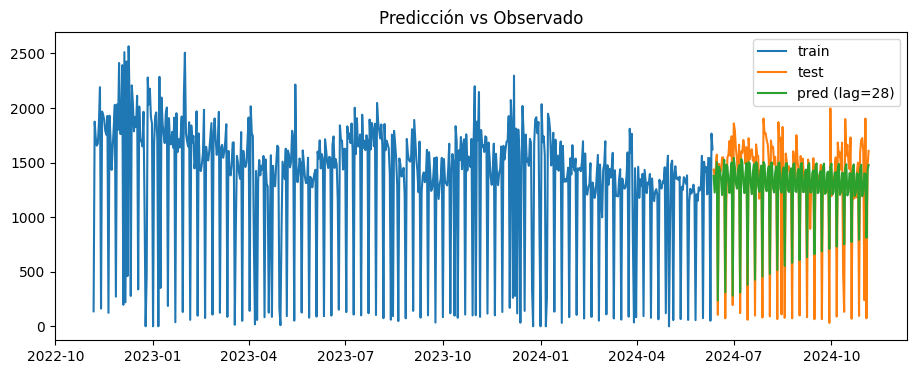

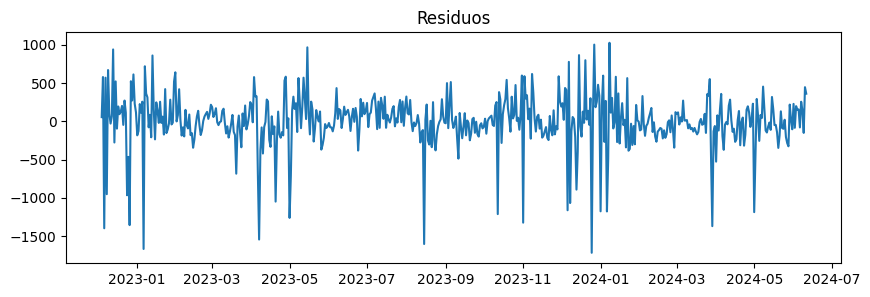

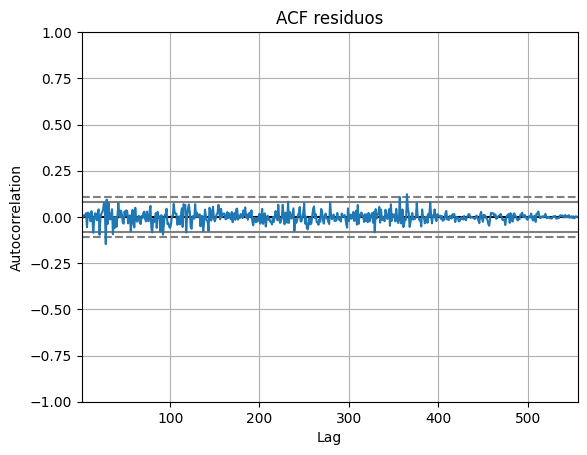

Durbin-Watson: 2.023831353470562
Ljung-Box (lag 10):
      lb_stat  lb_pvalue
10  2.759954   0.986522
MAE: 244.4345
RMSE: 326.3998
MAPE: 113.95343797989167
Coeficientes:
 const           325.227126
udsVenta.L1      -0.054961
udsVenta.L2       0.075449
udsVenta.L3      -0.096283
udsVenta.L4      -0.021937
udsVenta.L5       0.080541
udsVenta.L6      -0.053061
udsVenta.L7       0.303809
udsVenta.L8       0.001939
udsVenta.L9      -0.099677
udsVenta.L10     -0.029378
udsVenta.L11      0.095329
udsVenta.L12      0.066034
udsVenta.L13      0.038939
udsVenta.L14      0.213825
udsVenta.L15      0.041406
udsVenta.L16     -0.009421
udsVenta.L17     -0.018121
udsVenta.L18      0.012319
udsVenta.L19     -0.066067
udsVenta.L20      0.009813
udsVenta.L21      0.174671
udsVenta.L22     -0.029692
udsVenta.L23     -0.008963
udsVenta.L24      0.129540
udsVenta.L25     -0.093012
udsVenta.L26     -0.094195
udsVenta.L27     -0.013468
udsVenta.L28      0.190242
dtype: float64
P-valores:
 const           1.4

In [24]:
# Requisitos: pandas, numpy, matplotlib, statsmodels, sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# --- Preparar datos (usando el DataFrame que indicas)
# dfSTVentasTotales tiene columnas: idSecuencia (datetime64[ns]) y udsVenta (int)
df = dfSTVentasTotales.copy()

# Asegurarse de tipo fecha y ordenar
df['idSecuencia'] = pd.to_datetime(df['idSecuencia'])
df = df.sort_values('idSecuencia').reset_index(drop=True)

# Colocar la fecha como índice
df = df.set_index('idSecuencia')

# Si la serie tiene observaciones diarias consecutivas, fijar frecuencia diaria.
# Ajusta 'D' a la frecuencia correcta si no es diaria (p.ej. 'W' semanal, 'M' mensual).
try:
    series = df['udsVenta'].asfreq('D')  # intenta forzar frecuencia diaria
except Exception:
    series = df['udsVenta']

# Si aparecen NA tras asfreq, rellenar o interpolar según prefieras
series = series.fillna(method='ffill')  # forward-fill; puedes cambiar a .bfill() o interpolación

# Visualización rápida
plt.figure(figsize=(10,3))
plt.plot(series, label='udsVenta')
plt.title('Serie udsVenta')
plt.legend(); plt.show()

# --- División entrenamiento / prueba (último 20% como test)
n = len(series)
test_size = int(np.ceil(0.2 * n))
train, test = series[:-test_size], series[-test_size:]
print(f'Tamaño train: {len(train)}, tamaño test: {len(test)}')

# --- Selección de lag candidato
max_lag = min(30, max(5, int(0.1 * len(train))))
candidates = range(1, max_lag + 1)
results = []

for lag in candidates:
    try:
        m = AutoReg(train, lags=lag, old_names=False).fit()
        preds = m.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
        rmse = math.sqrt(mean_squared_error(test, preds))
        aic = getattr(m, 'aic', np.nan)
        bic = getattr(m, 'bic', np.nan)
        results.append({'lag': lag, 'aic': aic, 'bic': bic, 'rmse': rmse})
    except Exception as e:
        results.append({'lag': lag, 'aic': np.nan, 'bic': np.nan, 'rmse': np.nan})

res_df = pd.DataFrame(results).set_index('lag')
print(res_df)
res_df[['rmse']].plot(title='RMSE por lag'); plt.show()

# --- Elegir mejor lag por RMSE (puedes cambiar a AIC/BIC si prefieres)
best_lag = int(res_df['rmse'].idxmin())
print('Mejor lag según RMSE:', best_lag)

# --- Ajuste final con training set
model = AutoReg(train, lags=best_lag, old_names=False).fit()
print(model.summary())

# --- Predicción sobre test
pred = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(11,4))
plt.plot(train.index, train, label='train')
plt.plot(test.index, test, label='test')
plt.plot(test.index, pred, label=f'pred (lag={best_lag})')
plt.legend(); plt.title('Predicción vs Observado'); plt.show()

# --- Diagnóstico de residuos
resid = model.resid
plt.figure(figsize=(10,3))
plt.plot(resid); plt.title('Residuos'); plt.show()

pd.plotting.autocorrelation_plot(resid); plt.title('ACF residuos'); plt.show()

dw = durbin_watson(resid)
print('Durbin-Watson:', dw)

lb = acorr_ljungbox(resid, lags=[10], return_df=True)
print('Ljung-Box (lag 10):\n', lb)

# --- Métricas de evaluación
mae = mean_absolute_error(test, pred)
rmse = math.sqrt(mean_squared_error(test, pred))
# Evitar división por cero en MAPE: excluir ceros del denominador
nonzero_mask = test != 0
if nonzero_mask.sum() > 0:
    mape = (np.mean(np.abs((test[nonzero_mask] - pred[nonzero_mask]) / test[nonzero_mask]))) * 100
else:
    mape = np.nan

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape if not np.isnan(mape) else "NaN (valores reales cero)"}')

# --- Resultado: coeficientes significativos
coeffs = model.params
pvalues = model.pvalues
print('Coeficientes:\n', coeffs)
print('P-valores:\n', pvalues)
